In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('HW4_Train_Data.csv')
df.head()

,UNIX Timestamp (seconds),"Start Time (GMT-0800,PST)","End Time (GMT-0800,PST)",Bldg1 (kWh),Bldg2 (kWh),Bldg3 (kWh),Bldg4 (kWh),Bldg5 (kWh),Bldg6 (kWh),Bldg7 (kWh),...,Bldg14 (kWh),Bldg15 (kWh),Bldg16 (kWh),Bldg17 (kWh),Bldg18 (kWh),Bldg19 (kWh),Bldg20 (kWh),Bldg21 (kWh),Bldg22 (kWh),Bldg23 (kWh)
0,1388851200,1/5/14 00:00,1/5/14 00:59,0.19,0.97,0.03,0.02,0.26,1.47,0.10,...,0.24,1.76,0.11,0.09,0.61,0.03,1.70,3.23,0.14,0.99
1,1388854800,1/5/14 01:00,1/5/14 01:59,0.19,0.83,0.10,0.02,0.26,1.48,0.20,...,0.40,1.49,0.06,0.10,0.77,0.03,1.78,2.42,0.12,0.93
2,1388858400,1/5/14 02:00,1/5/14 02:59,0.19,0.89,0.08,0.08,0.24,1.45,0.10,...,0.36,1.57,0.05,0.08,0.75,0.03,1.68,2.31,0.13,0.47
3,1388862000,1/5/14 03:00,1/5/14 03:59,0.19,0.83,0.03,0.02,0.17,1.45,0.18,...,0.33,1.31,0.06,0.13,0.34,0.02,1.70,2.72,0.14,0.58
4,1388865600,1/5/14 04:00,1/5/14 04:59,0.19,0.83,0.03,0.02,0.18,1.69,0.14,...,0.29,0.03,0.06,0.16,0.15,0.03,1.75,0.69,0.11,0.44


# Problem 1: Exploratory Data Analysis

a. Create a bar plot of the average hourly energy consumption [kWh] for each building. Make the x-axis the building index number. Make the y-axis the average hourly energy consumption. In red, super impose error bars on your bars that indicate the standard deviation of hourly energy consumption. Provide this plot in your report. 

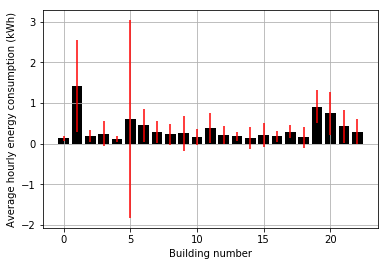

In [2]:
avgs = df.iloc[:,3:23+3].mean()
stds = df.iloc[:,3:23+3].std()
xs = np.arange(len(avgs))
plt.grid()
plt.bar(xs, avgs, color='black')
plt.errorbar(xs, avgs, color='red', yerr=stds, fmt='none')
plt.ylabel('Average hourly energy consumption (kWh)')
plt.xlabel('Building number')
plt.savefig('[4] HW4/1a.png')
plt.show()

b. Which building has abnormally high variance? Do any buildings have moments of NEGATIVE power consumption?  If so, then we will remove this building from our analysis.  This building likely installed solar during the year and the smart meter data aggregates power consumption and solar power generation, so it’s un-usable for this homework.

In [3]:
dft = df.drop('Bldg6 (kWh)', axis=1)
dft.head()

,UNIX Timestamp (seconds),"Start Time (GMT-0800,PST)","End Time (GMT-0800,PST)",Bldg1 (kWh),Bldg2 (kWh),Bldg3 (kWh),Bldg4 (kWh),Bldg5 (kWh),Bldg7 (kWh),Bldg8 (kWh),...,Bldg14 (kWh),Bldg15 (kWh),Bldg16 (kWh),Bldg17 (kWh),Bldg18 (kWh),Bldg19 (kWh),Bldg20 (kWh),Bldg21 (kWh),Bldg22 (kWh),Bldg23 (kWh)
0,1388851200,1/5/14 00:00,1/5/14 00:59,0.19,0.97,0.03,0.02,0.26,0.10,0.10,...,0.24,1.76,0.11,0.09,0.61,0.03,1.70,3.23,0.14,0.99
1,1388854800,1/5/14 01:00,1/5/14 01:59,0.19,0.83,0.10,0.02,0.26,0.20,0.11,...,0.40,1.49,0.06,0.10,0.77,0.03,1.78,2.42,0.12,0.93
2,1388858400,1/5/14 02:00,1/5/14 02:59,0.19,0.89,0.08,0.08,0.24,0.10,0.11,...,0.36,1.57,0.05,0.08,0.75,0.03,1.68,2.31,0.13,0.47
3,1388862000,1/5/14 03:00,1/5/14 03:59,0.19,0.83,0.03,0.02,0.17,0.18,0.11,...,0.33,1.31,0.06,0.13,0.34,0.02,1.70,2.72,0.14,0.58
4,1388865600,1/5/14 04:00,1/5/14 04:59,0.19,0.83,0.03,0.02,0.18,0.14,0.09,...,0.29,0.03,0.06,0.16,0.15,0.03,1.75,0.69,0.11,0.44


c. Re-organize your energy data set into a 4-D array. In order, the dimensions correspond to (i) building
index, (ii) week-of-year, (iii) day-of-week, and (iv) hour-of-day. For each element in the 4-D vector,
store the normalized energy. That is, divide kWh by the maximum hourly energy consumption for
that building.
* In seven separate figures (one for each day-of-week), plot the hourly energy consumption load
shapes vs. hour (x-axis) for each building - all super-imposed.
* In each of the seven figures, plot the average hourly energy consumption in a thick black line.

Provide these seven plots in your report. Comment on any observations you might hav

In [4]:
d4d = np.zeros((22,51,7,24)) 
zero = dft.iloc[0,0]
for i, row in dft.iterrows():
    tm = row[0]-zero
    wk = tm//(7*24*60*60)
    tm %= (7*24*60*60)
    dy = tm//(24*60*60)
    hr = (tm%(24*60*60))//(60*60)
    d4d[:,wk,dy,hr] = row[3:].values
print(d4d[:,-1,-1,-1])

[0.11 3.82 0.04 0.04 0.14 0.3  0.09 0.05 0.11 0.12 0.65 0.07 0.09 0.
 0.05 0.06 0.38 0.02 1.02 1.22 0.1  0.15]


In [5]:
dft.tail()

,UNIX Timestamp (seconds),"Start Time (GMT-0800,PST)","End Time (GMT-0800,PST)",Bldg1 (kWh),Bldg2 (kWh),Bldg3 (kWh),Bldg4 (kWh),Bldg5 (kWh),Bldg7 (kWh),Bldg8 (kWh),...,Bldg14 (kWh),Bldg15 (kWh),Bldg16 (kWh),Bldg17 (kWh),Bldg18 (kWh),Bldg19 (kWh),Bldg20 (kWh),Bldg21 (kWh),Bldg22 (kWh),Bldg23 (kWh)
8563,1419678000,12/27/14 19:00,12/27/14 19:59,0.31,1.27,0.07,0.02,0.06,0.53,0.25,...,0.08,0.05,0.05,0.08,0.37,0.02,2.32,1.25,0.09,0.15
8564,1419681600,12/27/14 20:00,12/27/14 20:59,0.25,1.30,0.08,0.06,0.26,3.08,0.26,...,0.07,0.00,0.05,0.06,1.18,0.02,2.09,1.24,0.10,0.17
8565,1419685200,12/27/14 21:00,12/27/14 21:59,0.14,1.12,0.04,0.02,0.30,2.20,0.15,...,0.09,0.00,0.05,0.07,0.62,0.02,1.64,1.22,0.10,0.15
8566,1419688800,12/27/14 22:00,12/27/14 22:59,0.14,1.09,0.08,0.02,0.29,0.92,0.14,...,0.06,0.05,0.01,0.07,0.36,0.03,1.29,1.22,0.10,0.16
8567,1419692400,12/27/14 23:00,12/27/14 23:59,0.11,3.82,0.04,0.04,0.14,0.30,0.09,...,0.09,0.00,0.05,0.06,0.38,0.02,1.02,1.22,0.10,0.15


In [6]:
d4dn = d4d.copy()
for i in range(d4dn.shape[0]):
    d4dn[i,:,:,:] /= np.amax(d4dn[i,:,:,:],axis=(0,1,2))

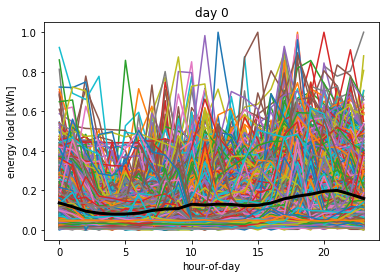

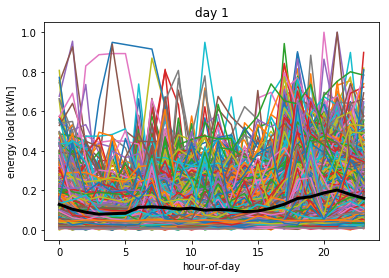

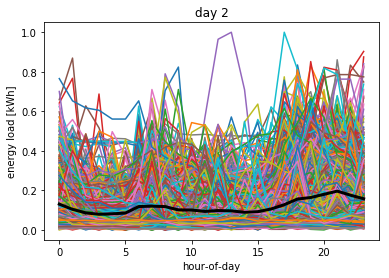

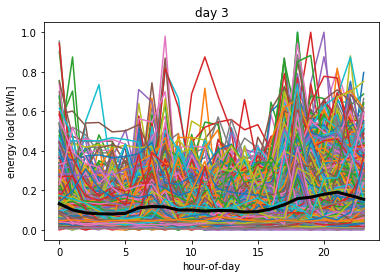

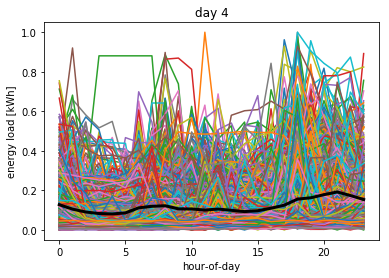

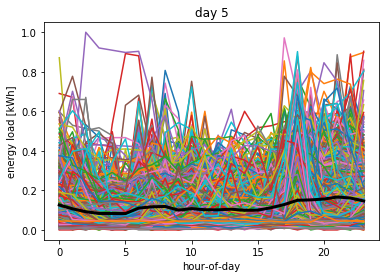

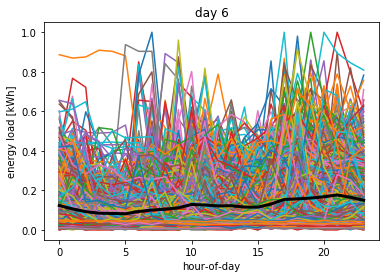

In [7]:
hrs = np.arange(24)
for i in range(7):
    for j in range(d4dn.shape[0]):
        for k in range(d4dn.shape[1]):
            plt.plot(hrs,d4dn[j,k,i,:])
    plt.plot(hrs,np.mean(d4dn[:,:,i,:],axis=(0,1)),color='k',linewidth=3)
    plt.xlabel('hour-of-day')
    plt.ylabel('energy load [kWh]')
    plt.title('day {}'.format(i))
    plt.savefig('[4] HW4/1c{}.png'.format(i))
    plt.show()

# Problem 2: Average Model

a. Download test data file `HW4_Test_Data.csv`. Load the CSV data into Matlab or Python. The test
data includes one week of normalized hourly load for Sunday Sept 7, 2014 00:00 – Saturday Sept 13,
2014 23:00. Generate seven plots (one for each DoW) which visualize HoD (x-axis) and the normalized
hourly energy for the Test Data and Average Model.

In [8]:
dftest = pd.read_excel('HW4_Test_Data.xlsx')
dftest.head()

,TestTime,TestBldg
0,2014-09-07 00:00:00,0.094276
1,2014-09-07 01:00:00,0.037037
2,2014-09-07 02:00:00,0.040404
3,2014-09-07 03:00:00,0.037037
4,2014-09-07 04:00:00,0.037037


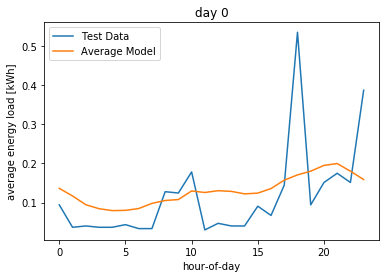

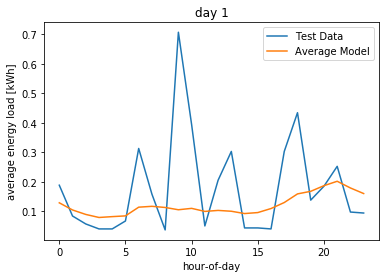

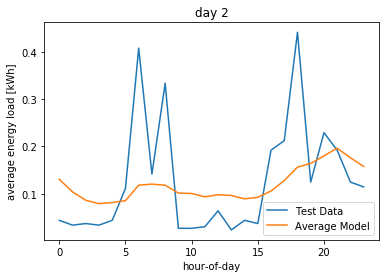

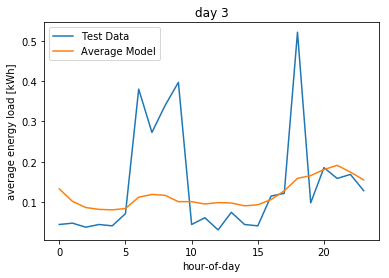

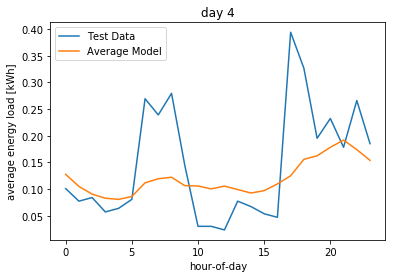

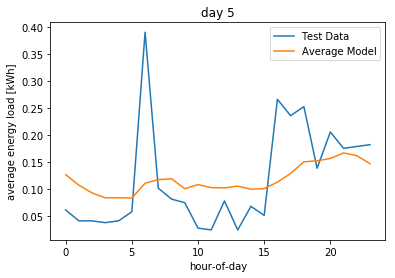

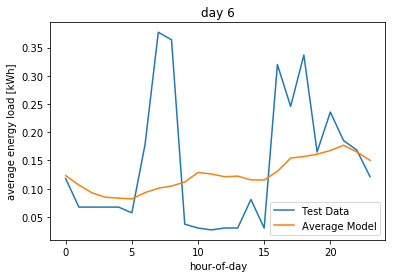

In [9]:
avgmod = np.mean(d4dn,axis=(0,1))
for i in range(7):
    plt.plot(hrs,dftest.iloc[i*(24):(i+1)*(24),1], label='Test Data')
    plt.plot(hrs,avgmod[i,:], label='Average Model')
    plt.xlabel('hour-of-day')
    plt.ylabel('average energy load [kWh]')
    plt.title('day {}'.format(i))
    plt.legend()
    plt.savefig('[4] HW4/2a{}.png'.format(i))
    plt.show()

b. Compute the mean absolute error (MAE) for each DoW and the entire week. Provide these error metrics in your report. Which DoW has the largest and smallest MAE?

In [10]:
MAEdays = np.zeros(7)
for i in range(7):
    MAEdays[i] = np.sum(np.abs(dftest.iloc[i*(24):(i+1)*(24),1] - avgmod[i,:]))/avgmod.shape[0]
MAEweek = np.sum(MAEdays)/avgmod.shape[0]
print('MAE for each day:')
print(MAEdays)
print('\nMAE for the week: {}'.format(MAEweek))

MAE for each day:
[0.24949369 0.37347504 0.27167509 0.28888393 0.23219685 0.21309519
 0.2709021 ]

MAE for the week: 0.27138884068755137


# Problem 3: Autoregressive with eXogeneous Inputs Model (ARX)

c. Solve your optimization problem with L= 3. In your report, give the optimal values of $α_1^*, α_2^*, α_3^*$.

In [11]:
L = 3
avgs = np.ravel(avgmod)

not4d = dft.iloc[:,3:]/dft.iloc[:,3:].max()
P = np.ravel(not4d.T).T
avgstiled = np.ravel(np.tile(avgs,(1,51*not4d.shape[1])))

Y = P-avgstiled
Phi = np.zeros((len(Y),L))
for i in range(len(avgstiled)):
    for j in range(L-1,-1,-1):
        if i%(len(avgs)*51) > j:
            Phi[i,j] = P[i-j-1]

Phi[0:10,]

array([[0.        , 0.        , 0.        ],
       [0.2345679 , 0.        , 0.        ],
       [0.2345679 , 0.2345679 , 0.        ],
       [0.2345679 , 0.2345679 , 0.2345679 ],
       [0.2345679 , 0.2345679 , 0.2345679 ],
       [0.2345679 , 0.2345679 , 0.2345679 ],
       [0.2345679 , 0.2345679 , 0.2345679 ],
       [0.17283951, 0.2345679 , 0.2345679 ],
       [0.16049383, 0.17283951, 0.2345679 ],
       [0.18518519, 0.16049383, 0.17283951]])

In [12]:
alphas,_,_,_ = np.linalg.lstsq(Phi,Y,rcond=None)
alphas

array([ 0.40088005, -0.04080743, -0.07318004])

d. Test your ARX model on the test data set. Generate seven plots (one for each DoW) which visualize HoD (x-axis) and the normalized hourly energy for the Test Data, the Average Model, and the ARX model. Report the MAE for each DoW, and the entire week

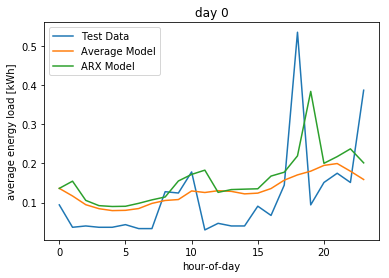

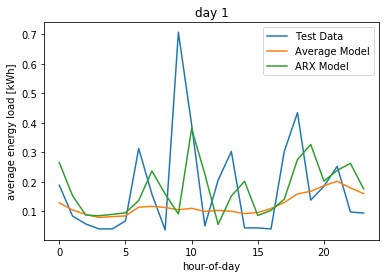

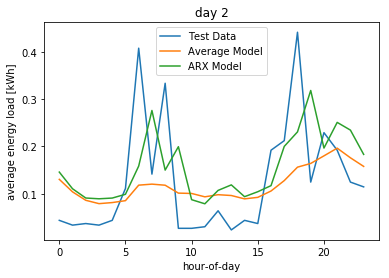

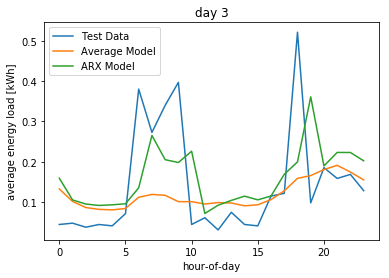

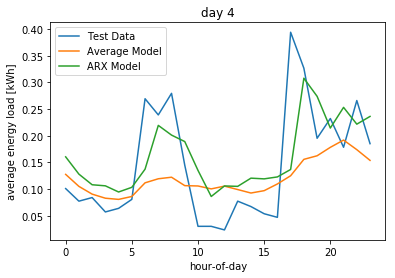

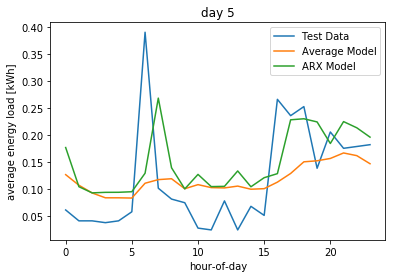

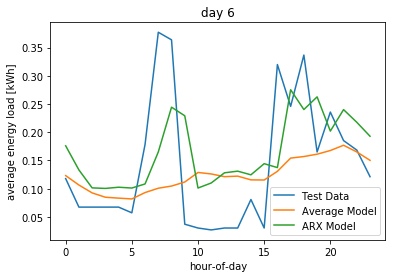

In [13]:
Ptest = np.pad(dftest.iloc[:,1].values,(L,0),'constant')
Phat = np.zeros(dftest.shape[0])
for j in range(len(Phat)):
    pls = Ptest[j:j+L]
    Phat[j] = np.dot(alphas,pls[::-1]) + avgs[j]

for i in range(7):
    plt.plot(hrs, dftest.iloc[i*(24):(i+1)*(24),1], label='Test Data')
    plt.plot(hrs, avgmod[i,:], label='Average Model')
    plt.plot(hrs, Phat[i*24:(i+1)*24], label='ARX Model')
    plt.xlabel('hour-of-day')
    plt.ylabel('average energy load [kWh]')
    plt.title('day {}'.format(i))
    plt.legend()
    plt.savefig('[4] HW4/3d{}.png'.format(i))
    plt.show()

In [14]:
MAEdays = np.zeros(7)
for i in range(7):
    MAEdays[i] = np.sum(np.abs(dftest.iloc[i*(24):(i+1)*(24),1] - Phat[i*(24):(i+1)*(24)]))/avgmod.shape[0]
MAEweek = np.sum(MAEdays)/7
print('MAE for each day:')
print(MAEdays)
print('\nMAE for the week: {}'.format(MAEweek))

MAE for each day:
[0.30495341 0.40434647 0.3159911  0.31321615 0.21684118 0.2410595
 0.28422079]

MAE for the week: 0.29723265585159336


# Problem 4: Neural Network Model

c. Implement the gradient descent algorithm yourself. Select an initial guess of $w_0 = 0 ∈ \mathcal{R}^3$. Use a small step size/learning rate, such as $γ = 0.01$. Perform at least three steps of gradient descent. In your report, give the final values of $w_1, w_2, w_3$.

In [15]:
gamma = 0.00001
steps = 3

w = np.zeros(3)
# w = alphas

def gdstep(w,gamma):
    Y4 = Y[3:]
    Phi4 = Phi[3:,:]
    w = w + gamma*np.sum(np.tile((Y4-np.tanh(w@Phi4.T)) * (1-np.tanh(w@Phi4.T)**2),(3,1)).T * Phi4,axis=0)
    return w

for i in range(steps):
    w = gdstep(w,gamma)
w

array([0.0444468 , 0.03320474, 0.02769263])

d. Test your NN model on the test data set. Generate seven plots (one for each DoW) which visualize
HoD (x-axis) and the normalized hourly energy for the Test Data, the Average Model, the ARX model,
and the NN model. Report the MAE for each DoW, and the entire week.

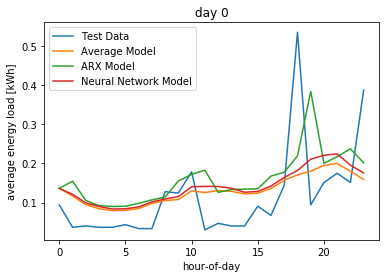

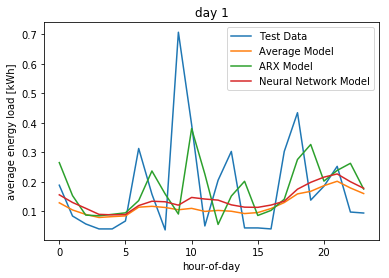

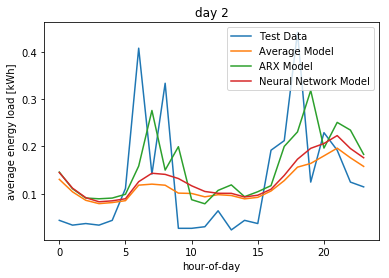

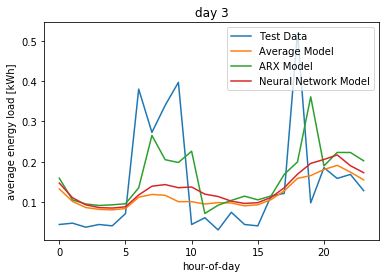

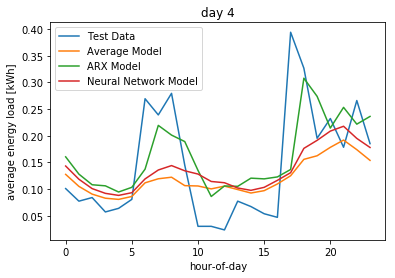

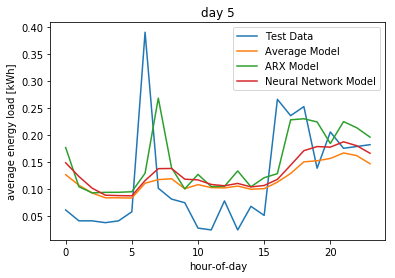

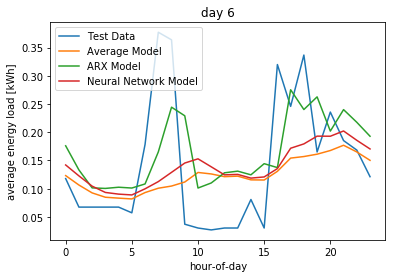

In [16]:
Ptest = np.pad(dftest.iloc[:,1].values,(L,0),'constant')
PhatNN = np.zeros(dftest.shape[0])
for j in range(len(Phat)):
    pls = Ptest[j:j+L]
    PhatNN[j] = np.tanh(np.dot(w,pls[::-1])) + avgs[j]

for i in range(7):
    plt.plot(hrs, dftest.iloc[i*(24):(i+1)*(24),1], label='Test Data')
    plt.plot(hrs, avgmod[i,:], label='Average Model')
    plt.plot(hrs, Phat[i*24:(i+1)*24], label='ARX Model')
    plt.plot(hrs, PhatNN[i*24:(i+1)*24], label='Neural Network Model')
    plt.xlabel('hour-of-day')
    plt.ylabel('average energy load [kWh]')
    plt.title('day {}'.format(i))
    plt.legend()
    plt.savefig('[4] HW4/4d{}.png'.format(i))
    plt.show()

In [17]:
MAEdays = np.zeros(7)
for i in range(7):
    MAEdays[i] = np.sum(np.abs(dftest.iloc[i*(24):(i+1)*(24),1] - PhatNN[i*(24):(i+1)*(24)]))/avgmod.shape[0]
MAEweek = np.sum(MAEdays)/7
print('MAE for each day:')
print(MAEdays)
print('\nMAE for the week: {}'.format(MAEweek))

MAE for each day:
[0.26860237 0.38405321 0.28522932 0.30971256 0.22480369 0.22436848
 0.28653011]

MAE for the week: 0.2833285336743186
